In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler

df = pd.read_csv('/Users/dhruvbharara/Downloads/companies.csv')



In [2]:
def converted(Avg_salary):
    if isinstance(Avg_salary,str):
        if 'k' in Avg_salary:
            return float(Avg_salary.replace('k',''))*1000
        else:
            return (Avg_salary)
    else:
        return Avg_salary

In [3]:
df['Avg_salary'] = df['Avg_salary'].apply(lambda x: converted(x))

In [4]:
df

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856900.0,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584600.0,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561500.0,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427400.0,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414400.0,2.8k,719,4k
...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72,454,2,26,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72,799,15,9,13
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72,489,3,11,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72,520,4,1,10


In [5]:
df.Avg_salary.dtypes

dtype('O')

In [6]:
df['Avg_salary'] = df['Avg_salary'].replace('--',0)


In [7]:
df['Avg_salary'] = df['Avg_salary'].astype(float)
filt1 = (df['Avg_salary'] > 350000)



In [8]:
df.loc[filt1,['Company_name','Avg_salary']]

,Company_name,Avg_salary
0,TCS,856900.0
1,Accenture,584600.0
2,Cognizant,561500.0
3,Wipro,427400.0
4,Capgemini,414400.0
7,Infosys,462000.0


In [9]:
df.columns

Index(['Company_name', 'Description', 'Ratings', 'Highly_rated_for',
       'Critically_rated_for', 'Total_reviews', 'Avg_salary',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits'],
      dtype='object')

In [10]:
def converted_interviews(Interviews_taken):
    if isinstance(Interviews_taken,str):
        if 'k' in Interviews_taken:
            return float(Interviews_taken.replace('k',''))*1000
        else:
            return Interviews_taken
    else:
        return Interviews_taken
    

In [11]:
df['Interviews_taken'] = df['Interviews_taken'].apply(lambda x: converted_interviews(x))

In [12]:
df.Interviews_taken

0       6100.0
1       4300.0
2       3600.0
3       3700.0
4       2800.0
         ...  
9995         2
9996        15
9997         3
9998         4
9999         7
Name: Interviews_taken, Length: 10000, dtype: object

In [13]:
df['Interviews_taken'] = df['Interviews_taken'].replace('--',0)

In [14]:
df['Interviews_taken'] = df['Interviews_taken'].astype("float")

In [15]:
filt2 = (df['Interviews_taken']>1000)

In [16]:
df.loc[filt2,['Company_name','Interviews_taken']]

,Company_name,Interviews_taken
0,TCS,6100.0
1,Accenture,4300.0
2,Cognizant,3600.0
3,Wipro,3700.0
4,Capgemini,2800.0
5,HDFC Bank,1500.0
6,ICICI Bank,1900.0
7,Infosys,4800.0
8,HCLTech,2500.0
9,Tech Mahindra,2400.0


In [17]:
def converted_reviews(Total_reviews):
    if isinstance(Total_reviews,str):
        if 'k' in Total_reviews:
            return float(Total_reviews.replace('k', ''))*1000
        else:
            return Total_reviews
    else:
        return Total_reviews

In [18]:
df['Total_reviews'] = df['Total_reviews'].apply(lambda x: converted_reviews(x))

In [19]:
df.Total_reviews

0       73100.0
1       46400.0
2       41700.0
3       39200.0
4       34000.0
         ...   
9995         72
9996         72
9997         72
9998         72
9999         72
Name: Total_reviews, Length: 10000, dtype: object

In [20]:
df['Total_reviews'] = df['Total_reviews'].replace('--',0)

In [21]:
df['Total_reviews'] = df['Total_reviews'].astype(float)

In [22]:
filt3 = (df['Total_reviews'] > 20000)

In [23]:
df.loc[filt3,['Company_name','Total_reviews']]

,Company_name,Total_reviews
0,TCS,73100.0
1,Accenture,46400.0
2,Cognizant,41700.0
3,Wipro,39200.0
4,Capgemini,34000.0
5,HDFC Bank,33900.0
6,ICICI Bank,33500.0
7,Infosys,31800.0
8,HCLTech,28500.0
9,Tech Mahindra,27600.0


In [24]:
df

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46400.0,584600.0,4300.0,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719,4k
...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72.0,454.0,2.0,26,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72.0,799.0,15.0,9,13
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72.0,489.0,3.0,11,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72.0,520.0,4.0,1,10


In [25]:
def converted_jobs_available(Total_jobs_available	):
    if isinstance(Total_jobs_available,str):
        if 'k' in Total_jobs_available	:
            return float(Total_jobs_available	.replace('k', ''))*1000
        else:
            return Total_jobs_available	
    else:
        return Total_jobs_available	

In [26]:
df['Total_jobs_available'] = df['Total_jobs_available'].apply(lambda x: converted_jobs_available(x))

In [27]:
df['Total_jobs_available'] = df['Total_jobs_available'].replace('--',0)

In [28]:
df['Total_jobs_available'] = df['Total_jobs_available'].astype(float)

In [29]:
filt4 = (df['Total_jobs_available']>200)
df.loc[filt4 , ['Company_name' , 'Total_jobs_available']]

,Company_name,Total_jobs_available
0,TCS,847.0
1,Accenture,9900.0
2,Cognizant,460.0
3,Wipro,405.0
4,Capgemini,719.0
...,...,...
9191,UpMan Placements,377.0
9247,HR+,237.0
9308,Antal International,1500.0
9564,Acsion Engineering,299.0


In [30]:
df

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847.0,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46400.0,584600.0,4300.0,9900.0,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460.0,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405.0,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719.0,4k
...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72.0,454.0,2.0,26.0,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72.0,799.0,15.0,9.0,13
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72.0,489.0,3.0,11.0,8
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72.0,520.0,4.0,1.0,10


In [31]:
def converted_mega_function(Total_benifits):
    if isinstance(Total_benifits,str):
        if 'k' in Total_benifits:
            return float(Total_benifits.replace('k',''))*1000
        elif '--' in Total_benifits:
            return "0"
        else:
            return Total_benifits
    else:
        return Total_benifits



In [32]:
df['Total_benefits'] = df['Total_benefits'].apply(lambda x : converted_mega_function(x))

In [33]:
df['Total_benefits'] = df['Total_benefits'].astype(float)
filt5 = (df['Total_benefits']>2000)
df.loc[filt5,['Company_name','Total_benefits']]

,Company_name,Total_benefits
0,TCS,11500.0
1,Accenture,7100.0
2,Cognizant,5800.0
3,Wipro,5000.0
4,Capgemini,4000.0
5,HDFC Bank,3200.0
6,ICICI Bank,3700.0
7,Infosys,5100.0
8,HCLTech,4100.0
9,Tech Mahindra,3600.0


In [34]:
filt_rating = (df['Highly_rated_for']).str.contains('Work Life Balance',na=False)  #this treats the missing values as false and so that they do not cause errors

In [35]:
df['Highly_rated_for'] = df['Highly_rated_for'].fillna('')


In [36]:
df.loc[filt_rating,['Company_name','Avg_salary']]

,Company_name,Avg_salary
0,TCS,856900.0
4,Capgemini,414400.0
10,Genpact,190400.0
15,Amazon,125200.0
16,IBM,221500.0
...,...,...
9993,Modern Public School,361.0
9994,MediaTek India Technology,938.0
9995,Techila Global Services,454.0
9996,RxLogix Corporation,799.0


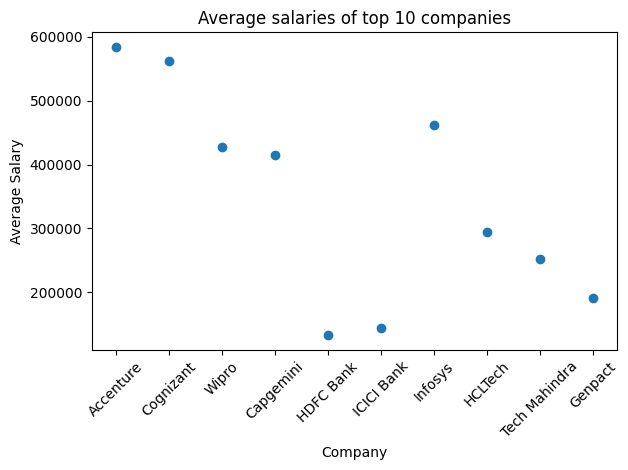

In [37]:
comp = df.loc[1:10, 'Company_name'].tolist()
sal = df.loc[1:10, 'Avg_salary'].tolist()

# Plotting
plt.scatter(range(1, len(comp) + 1), sal, marker='o')  # Using company index on x-axis
plt.xticks(range(1, len(comp) + 1), comp, rotation=45)  # Setting company names as x-axis labels with rotation
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.title('Average salaries of top 10 companies')
plt.tight_layout()
plt.show()

In [38]:
df.loc[1:10,['Company_name','Avg_salary']]

,Company_name,Avg_salary
1,Accenture,584600.0
2,Cognizant,561500.0
3,Wipro,427400.0
4,Capgemini,414400.0
5,HDFC Bank,132300.0
6,ICICI Bank,143600.0
7,Infosys,462000.0
8,HCLTech,293400.0
9,Tech Mahindra,251300.0
10,Genpact,190400.0


In [39]:
df.columns

Index(['Company_name', 'Description', 'Ratings', 'Highly_rated_for',
       'Critically_rated_for', 'Total_reviews', 'Avg_salary',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits'],
      dtype='object')

In [40]:
df.Interviews_taken
df.Total_jobs_available

0        847.0
1       9900.0
2        460.0
3        405.0
4        719.0
         ...  
9995      26.0
9996       9.0
9997      11.0
9998       1.0
9999       5.0
Name: Total_jobs_available, Length: 10000, dtype: float64

In [41]:
df.loc[1:10,'Interviews_taken']

1     4300.0
2     3600.0
3     3700.0
4     2800.0
5     1500.0
6     1900.0
7     4800.0
8     2500.0
9     2400.0
10    1900.0
Name: Interviews_taken, dtype: float64

In [42]:
df.Total_jobs_available.head(10)

0     847.0
1    9900.0
2     460.0
3     405.0
4     719.0
5     335.0
6     215.0
7    1100.0
8     408.0
9    1100.0
Name: Total_jobs_available, dtype: float64

In [44]:
df2 = pd.read_csv('/Users/dhruvbharara/Downloads/sample1.csv')

In [45]:
df2

,NAME,AGE,EXPERIENCE,SALARY
0,krish,23,2,1000000
1,sudanshu,34,12,2800000
2,priyank,32,10,2200000
3,jawal,28,6,1650000
4,mahesh,24,3,560000
5,rajesh,38,12,2240000
6,raju,25,4,1256000
7,makol,40,15,4500000
8,dhruv,22,1,850000
9,anmol,22,1,560000


In [50]:
df2['EXPERIENCE'].sum()
df2['SALARY'].sum()

19644000

AssertionError: 